курсовая работа

Зарплаты в San Francisco
https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv 

Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? 
(максимальная, медианная, средняя)
Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
Как распределяется бюджет на разные группы (department) с течением времени?
Какое количество людей в каждом департаменте? 
Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
На базе линейной регрессии постройте прогноз по тому, какие будут закупки на следующий год по каждому департаменту


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

from scipy.stats import cosine
import matplotlib.pyplot as plt
import csv
import sys
#from scipy.stats import gausshyper
#import pylab
#import random

import requests

In [166]:
#df = list(csv.DictReader(open('Salaries.csv', encoding='utf-8', newline='')))  #telecom_churn.csv
#url = f'https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing/telecom_churn.csv'
#url=f'https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv'
df = pd.read_csv('Salaries.csv')
#df.head(15)


C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [165]:
#df = pd.read_csv(url,index_col=0,parse=True)
#df.head()

TypeError: parser_f() got an unexpected keyword argument 'parse'

In [157]:
df.shape

(148654, 13)

In [78]:
df.isna().sum()  # Benefits - ПРЕИМУЩЕСТВА ??? прверяем на наличие NaN в общей базе

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

In [92]:
#проверка дублей
df.duplicated().sum()

0

In [79]:
df.groupby(['BasePay'])['BasePay'].count() #проверяю количество нулей, отрицательных значений, и др.


BasePay
14.25      1
15.83      3
17.48      1
18.81      1
23.08      1
          ..
9987.04    1
9991.53    1
9997.15    1
9998.60    1
9999.59    1
Name: BasePay, Length: 109886, dtype: int64

In [67]:
# удаляем Not Provided - не предоставлено
df = df.drop(df[df.BasePay =='Not Provided'].index)


In [76]:
# переводим сумму float и удаляем все отрицательные и нулевые суммы
df = df.drop(df[df.BasePay.astype(float) <=0.0].index)


In [77]:
# меняем все пустоты NaN на значение медианы 
df.fillna(df.BasePay.median(),inplace = True) 

In [80]:
#проверить на корретность полей, базовая оплата базовая оплата - очень маленький %, можно удалить
df.BasePay.value_counts(normalize=True) 

65258.01    0.0
54703.00    0.0
55026.0     0.0
48472.4     0.0
65448.0     0.0
             ..
118182.11   0.0
70429.44    0.0
118186.13   0.0
118187.5    0.0
4830.14     0.0
Name: BasePay, Length: 109886, dtype: float64

In [81]:
#проверить на корретность полей, другие значения - Оплата сверхурочной работы -- очень маленький %, можно удалить
df.OvertimePay.value_counts(normalize=True) 

0.0        0.4
0.00       0.1
681.23     0.0
10.68      0.0
152.13     0.0
            ..
976.26     0.0
571.51     0.0
35515.23   0.0
302.89     0.0
38043.49   0.0
Name: OvertimePay, Length: 66484, dtype: float64

In [84]:
df.groupby(['OvertimePay'])['OvertimePay'].count() #проверяю количество нулей, отрицательных значений, и др.

OvertimePay
0.02       1
0.52       1
0.77       1
1.76       1
2.87       1
          ..
996.54     1
9968.07    1
997.69     1
997.76     1
9971.17    1
Name: OvertimePay, Length: 66481, dtype: int64

In [83]:
# переводим сумму float и удаляем все отрицательные и нулевые суммы
df = df.drop(df[df.OvertimePay.astype(float) <=0.0].index)

In [87]:
#проверить на корретность полей, другие значения - другое -- очень маленький %, можно удалить
df.OtherPay.value_counts(normalize=True) 

624.0      0.0
250.0      0.0
648.0      0.0
874.0      0.0
624.00     0.0
            ..
168.43     0.0
11976.62   0.0
7830.85    0.0
1469.85    0.0
2.0        0.0
Name: OtherPay, Length: 57864, dtype: float64

In [86]:
# переводим сумму float и удаляем все отрицательные и нулевые суммы
df = df.drop(df[df.OtherPay.astype(float) <=0.0].index)

In [99]:
#проверить на корретность полей, другие значения - другое -- очень маленький %, можно удалить
df.TotalPay.value_counts(normalize=True) 

5,562.6     0.0
4,312.4     0.0
58,446.9    0.0
5,505.9     0.0
57,886.9    0.0
             ..
57,828.3    0.0
131,182.5   0.0
159,097.1   0.0
76,026.1    0.0
89,528.5    0.0
Name: TotalPay, Length: 64010, dtype: float64

In [101]:
MEDICAL=['PATIENT','PARAMEDIC','MEDICAL','NURSE','MENTAL','HEALTH','PHYSICIAN','PSYCHIATRIC','NURSING','HOSPITAL','PHYSICAL','THERAP','PHARMAC','PSYCHOLOGIST','X-RAY','NUTRITIONIST','DIETITIAN','ANESTHETIST','EPIDEMIOLOGIST','DENTAL','CLINICAL','REHABILITATION','HLTH','PATHOLOGIST','DISEASE','CARE','SURGICAL','DENTIST','MORGUE','REHABILITATION','PATIENT','MED STAFF','EPIDEMIOLOGIST']
df_MEDICAL = pd.DataFrame()
for i in MEDICAL:
    df_MEDICAL = df_MEDICAL.append(df[df['JobTitle'].str.upper().str.contains(i)])

In [104]:
df_MEDICAL.shape

(16586, 13)

In [105]:
df_MEDICAL.TotalPay.describe()

count    16,586.0
mean     84,222.0
std      43,060.0
min         312.2
25%      55,250.7
50%      74,430.1
75%     115,120.4
max     337,204.9
Name: TotalPay, dtype: float64

In [ ]:
pd.options.display.float_format = '{:,.1f}'.format #чтобы округлял значения до сотых:

In [167]:
dr3=df_MEDICAL.groupby(['Year'])['TotalPay'].agg(['median','min','mean','count']) 
dr3

,median,min,mean,count
Year,,,,
2011,"69,178.2",839.6,"78,508.0",4327
2012,"73,693.9",312.2,"82,982.7",4042
2013,"80,213.1","1,149.8","90,043.7",4000
2014,"75,018.7","1,083.1","85,750.7",4217


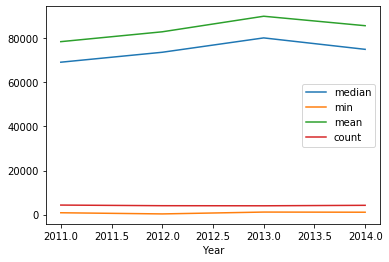

In [173]:
dr3.plot();

In [109]:
POLICE=['Sergeant','OFFICER','POLICE','Captain','Investigator','ATTORNEY','Criminalist','Examiner','Fingerprint','RESEARCH','Inspector','Fingerprint','Technician','Engineering','Assistant','Criminal','COMMISSIONER','ATTORNEY','Service','Witness']

df_POLICE = pd.DataFrame()
for i in POLICE:
    df_POLICE = df_POLICE.append(df[df['JobTitle'].str.upper().str.contains(i)])

In [110]:
df_POLICE.shape

(14814, 13)

In [131]:
dr2=df_POLICE.groupby(['Year'])['TotalPay'].agg(['median','min','max','count']) 

In [113]:
df_POLICE.TotalPay.describe()

count    14,814.0
mean    123,885.6
std      35,653.6
min       2,084.6
25%     108,526.1
50%     129,421.0
75%     144,234.4
max     538,909.3
Name: TotalPay, dtype: float64

In [115]:
FIRE=['FIRE']

df_FIRE = pd.DataFrame()
for i in FIRE:
    df_FIRE = df_FIRE.append(df[df['JobTitle'].str.upper().str.contains(i)])

In [116]:
df_FIRE.shape

(5345, 13)

In [132]:
dr1=df_FIRE.groupby(['Year'])['TotalPay'].agg(['median','min','max','count']) 
dr1

,median,min,max,count
Year,,,,
2011,"147,765.0","22,239.4","326,373.2",1316
2012,"158,027.6","25,138.3","362,844.7",1325
2013,"165,918.4","19,646.6","347,102.3",1356
2014,"157,963.4","7,870.4","335,485.0",1348


In [118]:
df_FIRE.TotalPay.describe()

count     5,345.0
mean    158,270.0
std      44,743.1
min       7,870.4
25%     134,747.4
50%     157,263.7
75%     184,046.1
max     362,844.7
Name: TotalPay, dtype: float64

In [133]:
dk=pd.concat([dr1,dr2,dr3],axis=1)


dk

,median,min,max,count,median,min,max,count,median,min,max,count
Year,,,,,,,,,,,,
2011,"147,765.0","22,239.4","326,373.2",1316,"123,465.9","2,230.0","538,909.3",4246,"69,178.2",839.6,"278,569.2",4327
2012,"158,027.6","25,138.3","362,844.7",1325,"128,955.8","2,084.6","249,667.7",3530,"73,693.9",312.2,"337,204.9",4042
2013,"165,918.4","19,646.6","347,102.3",1356,"136,122.4","10,376.6","262,317.8",3493,"80,213.1","1,149.8","286,416.2",4000
2014,"157,963.4","7,870.4","335,485.0",1348,"129,709.0","11,888.4","267,902.7",3545,"75,018.7","1,083.1","258,571.0",4217


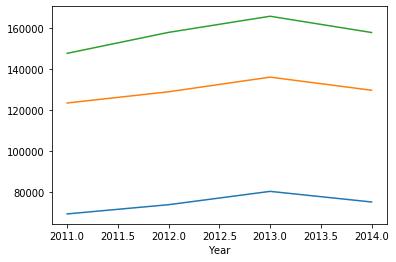

In [185]:
dr3['median'].plot() # "green",linewidth=5, label='медицина',alpha=0.5);
dr2['median'].plot() #"red",linewidth=5, label='полиция',alpha=0.5);
dr1['median'].plot()#"blue",linewidth=5, label='пожарные',alpha=0.5);


#plt.figure(figsize=(2,5))

#plt.plot(dr1.median, "blue",linewidth=5, label='полиция', alpha=0.5)

In [ ]:
ДАЛЬШЕ НЕ ЧИТАТЬ! РАБОЧИЕ МОМЕНТЫ

In [186]:
k=df['JobTitle'].value_counts()  #500
#k[50:100]

In [129]:
df['JobTitle'].str.upper()

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148649                                         CUSTODIAN
148650                                      NOT PROVIDED
148651                                      NOT PROVIDED
148652                                      NOT PROVIDED
148653                        COUNSELOR, LOG CABIN RANCH
Name: JobTitle, Length: 148654, dtype: object

In [ ]:
 mode = "access"
>>> allowed_modes =["access", "read", "write"]
>>> 
>>> def f1():
...    mode in allowed_modes
... 
>>> def f2():
...    any(mode == x for x in allowed_modes)

In [ ]:
'patient|paramedic|medical|nurse|MENTAL|health|physician|psychiatric|nursing|Hospital|Physical|Therap|Pharmac|Psychologist|X-Ray|Nutritionist|Dietitian|Anesthetist|Epidemiologist|Dental|CLINICAL|Rehabilitation|Hlth|Speech Pathologist|Disease|Care|SURGICAL|Dentist|Morgue|Rehabilitation|PATIENT|Med Staff|EPIDEMIOLOGIST'

In [193]:
#snippet_r = [rfind('DEPARTMENT') for el in df.JobTitle] 
#sd=df[df['JobTitle'].str.contains(pat)]
df_d = df[df['JobTitle'].str.upper().str.contains('MEDICAL|NURSE')]
#aa=str.upper.df['JobTitle']


#df_d = df[df['JobTitle'].str.upper()==x for x in title] # вытаскиваем MEDICAL с Upper
#df_d = df[df['JobTitle'].str.contains.list.title]
#df_d

In [47]:
data = pd.DataFrame({'MEDICAL':['PATIENT','PARAMEDIC','MEDICAL','NURSE','MENTAL','HEALTH','PHYSICIAN','PSYCHIATRIC','NURSING','HOSPITAL','PHYSICAL','THERAP','PHARMAC','PSYCHOLOGIST','X-RAY','NUTRITIONIST','DIETITIAN','ANESTHETIST','EPIDEMIOLOGIST','DENTAL','CLINICAL','REHABILITATION','HLTH','PATHOLOGIST','DISEASE','CARE','SURGICAL','DENTIST','MORGUE','REHABILITATION','PATIENT','MED STAFF','EPIDEMIOLOGIST'],
                     'POLICE':['Sergeant','OFFICER','POLICE','Captain','Investigator','ATTORNEY','Criminalist','Examiner','Fingerprint','RESEARCH','Inspector','Fingerprint','Technician','Engineering','Assistant','Criminal','COMMISSIONER','ATTORNEY','Service','Witness'],
                     'FIRE':['FIRE']
                    })
#print(data[data['Type'].str.contains('Fruit')])
data

ValueError: arrays must all be same length

In [37]:
pd.options.display.float_format = '{:,.1f}'.format #чтобы округлял значения до сотых:
#dk=df1.groupby(['Year'])['TotalPay'].agg(['sum', 'count']) 
dk_median=df1.groupby(['Year'])['TotalPay'].median() 
#dk.plot()
dk_median
#orders.groupby(['ship_mode', 'order_date'])['sales'].agg(['sum', 'count'])                    sum  count



Year
2011   69,178.2
2012   73,693.9
2013   80,213.1
2014   54,920.2
Name: TotalPay, dtype: float64

In [35]:
dk_min=df1.groupby(['Year'])['TotalPay'].min() 
dk_min

Year
2011     839.6
2012     312.2
2013   1,149.8
2014       6.0
Name: TotalPay, dtype: float64

In [36]:
dk_max=df1.groupby(['Year'])['TotalPay'].max() 
dk_max

Year
2011   278,569.2
2012   337,204.9
2013   286,416.2
2014   258,571.0
Name: TotalPay, dtype: float64

In [248]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2011 to 2014
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sum     4 non-null      float64
 1   count   4 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 96.0 bytes


In [38]:
df1.TotalPay.describe()

count    19,644.0
mean     74,975.4
std      45,918.4
min           6.0
25%      44,791.9
50%      67,054.4
75%     104,708.1
max     337,204.9
Name: TotalPay, dtype: float64

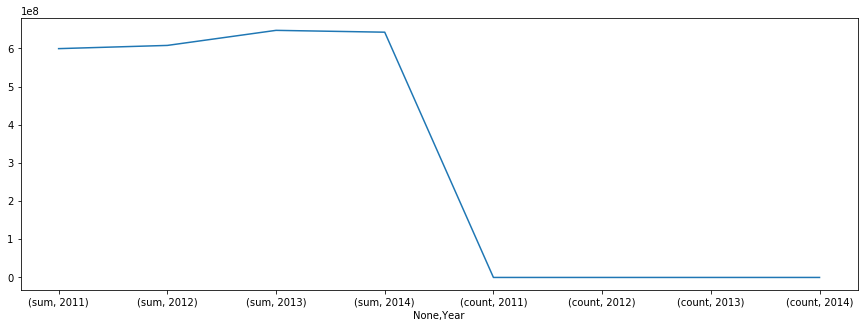

In [275]:
plt.figure(figsize=(15,5))
#plt.plot(dk.TotalPay,dk.Year, "blue",linewidth=5, label='полиция', alpha=0.5)
#plt.plot(df_df.TotalPay, "red",linewidth=5, label='пожарные')
dk.unstack().plot()
#plt.plot(dk.sum,dk.count,linewidth=5, label='медицина',alpha=0.5)

In [31]:
del df['Benefits']


In [35]:
df.drop('Agency', axis=1, inplace=True)

In [36]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,2014
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014


In [25]:
df.drop('Notes',axis=1)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [28]:
df_dd.drop('Benefits',axis=1) # удаление столбцов нулевого значения
df_dd



,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
11,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722,87082.6,110804,NaN,297608.92,297608.92,2011,NaN,San Francisco,NaN
15,16,RICHARD CORRIEA,"COMMANDER III, (POLICE DEPARTMENT)",198778,73478.2,13957.6,NaN,286213.86,286213.86,2011,NaN,San Francisco,NaN
25,26,GREGORY SUHR,CHIEF OF POLICE,256470,0,11522.2,NaN,267992.59,267992.59,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,35132,CYNTHIA HAYNES-EPPERSON,SENIOR POLICE COMMUNICATIONS DISPATCHER,1006.4,0,361.82,NaN,1368.22,1368.22,2011,NaN,San Francisco,NaN
35151,35152,LYNN BLOOM,POLICE SERVICES AIDE,0,0,1324.8,NaN,1324.80,1324.80,2011,NaN,San Francisco,NaN
35318,35319,ROBERT CHAPMAN,POLICE OFFICER III,0,0,1088,NaN,1088.00,1088.00,2011,NaN,San Francisco,NaN
35671,35672,RUSSELL MATLI,POLICE OFFICER III,0,0,597.31,NaN,597.31,597.31,2011,NaN,San Francisco,NaN


In [26]:
df_dd=df_d.copy()

In [27]:
df_dd

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
11,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722,87082.6,110804,NaN,297608.92,297608.92,2011,NaN,San Francisco,NaN
15,16,RICHARD CORRIEA,"COMMANDER III, (POLICE DEPARTMENT)",198778,73478.2,13957.6,NaN,286213.86,286213.86,2011,NaN,San Francisco,NaN
25,26,GREGORY SUHR,CHIEF OF POLICE,256470,0,11522.2,NaN,267992.59,267992.59,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,35132,CYNTHIA HAYNES-EPPERSON,SENIOR POLICE COMMUNICATIONS DISPATCHER,1006.4,0,361.82,NaN,1368.22,1368.22,2011,NaN,San Francisco,NaN
35151,35152,LYNN BLOOM,POLICE SERVICES AIDE,0,0,1324.8,NaN,1324.80,1324.80,2011,NaN,San Francisco,NaN
35318,35319,ROBERT CHAPMAN,POLICE OFFICER III,0,0,1088,NaN,1088.00,1088.00,2011,NaN,San Francisco,NaN
35671,35672,RUSSELL MATLI,POLICE OFFICER III,0,0,597.31,NaN,597.31,597.31,2011,NaN,San Francisco,NaN


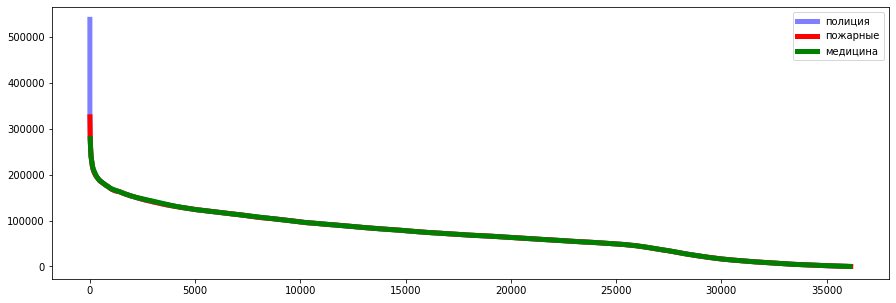

In [118]:

plt.figure(figsize=(15,5))
plt.plot(df_d.TotalPay, "blue",linewidth=5, label='полиция', alpha=0.5)
plt.plot(df_df.TotalPay, "red",linewidth=5, label='пожарные')
plt.plot(df_dfm.TotalPay, "green",linewidth=5, label='медицина')
plt.legend(loc='best')
plt.show()

In [26]:
df_d.groupby(['JobTitle','TotalPay'])['Year'].count()

JobTitle                                    TotalPay 
ASSISTANT INSPECTOR (POLICE DEPARTMENT)     188999.20    1
ASSISTANT INSPECTOR II (POLICE DEPARTMENT)  129913.87    1
                                            142484.42    1
                                            143844.45    1
                                            149776.31    1
                                                        ..
SERGEANT III (POLICE DEPARTMENT)            207277.85    1
                                            209213.81    1
                                            210076.88    1
                                            212179.09    1
                                            214944.74    1
Name: Year, Length: 667, dtype: int64

In [82]:
df_d.groupby(['Year'])['Year'].count()

Year
2011    2512
Name: Year, dtype: int64

In [99]:
df_d.groupby(['Year'])['TotalPay'].mean()

Year
2011    126704.417933
Name: TotalPay, dtype: float64

In [31]:
df_d.shape #  количество строк, столбцов полиция

(667, 13)

In [29]:
df_d.TotalPay.median() # медиана

152379.47

In [97]:
(df[df['JobTitle'].str.contains('POLICE')]).median()

C:\Users\user\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Id                    4594.000
BasePay             111976.140
OvertimePay           6376.980
OtherPay              7764.400
Benefits                   NaN
TotalPay            127177.465
TotalPayBenefits    127177.465
Year                  2011.000
Notes                      NaN
Status                     NaN
dtype: float64

In [98]:
(df[df['JobTitle'].str.contains('POLICE')]).describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,2512.000000,2512.00000,2512.00000,2512.0,0.0
mean,6246.502787,127097.17166,127097.17166,2011.0,NaN
std,6222.568916,36595.75152,36595.75152,0.0,NaN
min,2.000000,283.86000,283.86000,2011.0,NaN
25%,2519.250000,114148.38250,114148.38250,2011.0,NaN
50%,4594.000000,127177.46500,127177.46500,2011.0,NaN
75%,6867.500000,146340.08750,146340.08750,2011.0,NaN
max,35903.000000,538909.28000,538909.28000,2011.0,NaN


In [30]:
df_d.describe() # количество, средеее, стандартное, минимальное


,Id,TotalPay,TotalPayBenefits,Year,Notes
count,667.000000,667.000000,667.000000,667.0,0.0
mean,2197.863568,158810.073568,158810.073568,2011.0,NaN
std,2150.428932,31092.000146,31092.000146,0.0,NaN
min,2.000000,283.860000,283.860000,2011.0,NaN
25%,1044.500000,142386.050000,142386.050000,2011.0,NaN
50%,2084.000000,152379.470000,152379.470000,2011.0,NaN
75%,2884.000000,168241.215000,168241.215000,2011.0,NaN
max,35903.000000,538909.280000,538909.280000,2011.0,NaN


In [112]:
df_df = df[df['JobTitle'].str.contains("FIRE")]
df_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999,71344.9,33149.9,NaN,299494.17,299494.17,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34790,34791,CHARLES JOHNSON,FIREFIGHTER,0,0,1966.11,NaN,1966.11,1966.11,2011,NaN,San Francisco,NaN
34927,34928,THOMAS LEEPER,FIRE FIGHTER PARAMEDIC,0,11.21,1707.63,NaN,1718.84,1718.84,2011,NaN,San Francisco,NaN
35811,35812,ROBERTO LUCHA,FIREFIGHTER,0,217.1,185.07,NaN,402.17,402.17,2011,NaN,San Francisco,NaN
36076,36077,DEBRA TANIS,FIRE RESCUE PARAMEDIC,0,0,92.21,NaN,92.21,92.21,2011,NaN,San Francisco,NaN


In [34]:
df_df.shape # количество строк, столбцов пожарные

(222, 13)

In [62]:
df_df.groupby(['Year'])['TotalPay'].mean()

Year
2011    62462.845916
Name: TotalPay, dtype: float64

In [35]:
df_df.TotalPay.median() # медиана

168722.32

In [36]:
df_df.describe() # количество, средеее, стандартное, минимальное

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,222.000000,222.000000,222.000000,222.0,0.0
mean,1619.711712,177504.265135,177504.265135,2011.0,NaN
std,2650.054188,41920.667294,41920.667294,0.0,NaN
min,5.000000,7093.370000,7093.370000,2011.0,NaN
25%,312.250000,148055.222500,148055.222500,2011.0,NaN
50%,1028.000000,168722.320000,168722.320000,2011.0,NaN
75%,2355.250000,196081.595000,196081.595000,2011.0,NaN
max,32624.000000,326373.190000,326373.190000,2011.0,NaN


In [113]:
df_dfm = df[df['JobTitle'].str.contains("MEDICAL")]   #DEPARTMENT
df_dfm

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
17,18,SEBASTIAN WONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140547,119397,18625.1,NaN,278569.21,278569.21,2011,NaN,San Francisco,NaN
19,20,ELLEN MOFFATT,ASSISTANT MEDICAL EXAMINER,257511,880.16,16159.5,NaN,274550.25,274550.25,2011,NaN,San Francisco,NaN
20,21,VENUS AZAR,ASSISTANT MEDICAL EXAMINER,257510,0,16679.8,NaN,274190.27,274190.27,2011,NaN,San Francisco,NaN
21,22,JUDY MELINEK,ASSISTANT MEDICAL EXAMINER,257510,377.21,15883.6,NaN,273771.21,273771.21,2011,NaN,San Francisco,NaN
36,37,SUSAN CURRIN,"ADMINISTRATOR, SFGH MEDICAL CENTER",245124,0,12000,NaN,257124.44,257124.44,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35392,35393,KATANYA HENRY,MEDICAL EVALUATIONS ASSISTANT,0,0,952.23,NaN,952.23,952.23,2011,NaN,San Francisco,NaN
35597,35598,JOHN CORTEZ,MEDICAL SOCIAL WORKER,0,0,672.04,NaN,672.04,672.04,2011,NaN,San Francisco,NaN
35732,35733,NICOLE BARTOLINI,MEDICAL SOCIAL WORKER,516.4,0,20.66,NaN,537.06,537.06,2011,NaN,San Francisco,NaN
35764,35765,CRAIG STROOPE,MEDICAL EXAMINER'S INVESTIGATOR I,0,0,481.02,NaN,481.02,481.02,2011,NaN,San Francisco,NaN


In [53]:
df_dfm.TotalPay.median() # медиана

55376.42

In [63]:
df_dfm.groupby(['Year'])['TotalPay'].mean()

Year
2011    62462.845916
Name: TotalPay, dtype: float64

In [54]:
df_dfm.describe() # количество, средеее, стандартное, минимальное

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,431.000000,431.000000,431.000000,431.0,0.0
mean,21038.812065,62462.845916,62462.845916,2011.0,NaN
std,7847.508912,43012.876176,43012.876176,0.0,NaN
min,18.000000,42.020000,42.020000,2011.0,NaN
25%,15745.500000,45185.780000,45185.780000,2011.0,NaN
50%,22742.000000,55376.420000,55376.420000,2011.0,NaN
75%,25951.500000,75045.760000,75045.760000,2011.0,NaN
max,36116.000000,278569.210000,278569.210000,2011.0,NaN


In [56]:
print('Количество df_d.TotalPay.count(),df_df.TotalPay.count(),df_dfm.TotalPay.count())

2512 431 431


In [72]:
print('Среднее значение по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].mean());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].mean());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].mean());

Среднее значение по зп:
 полиция Year
2011    127097.17166
Name: TotalPay, dtype: float64

 пожарные Year
2011    62462.845916
Name: TotalPay, dtype: float64

 медицина Year
2011    62462.845916
Name: TotalPay, dtype: float64


In [73]:
print('Максимальное значение по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].max());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].max());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].max());

Среднее значение по зп:
 полиция Year
2011    538909.28
Name: TotalPay, dtype: float64

 пожарные Year
2011    278569.21
Name: TotalPay, dtype: float64

 медицина Year
2011    278569.21
Name: TotalPay, dtype: float64


In [74]:
print('Медиана по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].median());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].median());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].median());

Среднее значение по зп:
 полиция Year
2011    127177.465
Name: TotalPay, dtype: float64

 пожарные Year
2011    55376.42
Name: TotalPay, dtype: float64

 медицина Year
2011    55376.42
Name: TotalPay, dtype: float64


In [ ]:
#Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами?

In [86]:
print('базовая оплата\n','полиция',df_d.BasePay,'\n','пожарные',df_df.BasePay,'\n','медицина',df_dfm.BasePay)
      
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].median());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].median());

print('Среднее значение по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].median());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].median());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].median());

print('Среднее значение по зп:\n','полиция',df_d.groupby(['Year'])['TotalPay'].median());
print('\n','пожарные',df_df.groupby(['Year'])['TotalPay'].median());
print('\n','медицина',df_dfm.groupby(['Year'])['TotalPay'].median());

базовая оплата
 полиция 1        155966
2        212739
11        99722
15       198778
25       256470
          ...  
35131    1006.4
35151         0
35318         0
35671         0
35902         0
Name: BasePay, Length: 2512, dtype: object 
 пожарные 17       140547
19       257511
20       257510
21       257510
36       245124
          ...  
35392         0
35597         0
35732     516.4
35764         0
36115         0
Name: BasePay, Length: 431, dtype: object 
 медицина 17       140547
19       257511
20       257510
21       257510
36       245124
          ...  
35392         0
35597         0
35732     516.4
35764         0
36115         0
Name: BasePay, Length: 431, dtype: object

 пожарные Year
2011    55376.42
Name: TotalPay, dtype: float64

 медицина Year
2011    55376.42
Name: TotalPay, dtype: float64
Среднее значение по зп:
 полиция Year
2011    127177.465
Name: TotalPay, dtype: float64

 пожарные Year
2011    55376.42
Name: TotalPay, dtype: float64

 медицина Year
201

In [12]:
kol=0
for kol in df.JobTitle:
    k=df.JobTitle[kol]
    print(k)

      #url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={113}'
    #res = requests.get(url)
    #vacancies = res.json()
    snippet_r = ['DEPARTMENT' for el in df.JobTitle] 
    #snippet_r = [el.get('snippet') for el in vacancies.get('items')] 
    #for elem in snippet_r:
     #   df1=elem.get('requirement')
     #   df2=elem.get('responsibility')
    

#l = df['JobTitle'].str.contains("POLICE").values()#.str.rfind("POLICE") #.upper()
#l
#print(l)
#sub=['%DEPARTMENT%']
#long_df["Indexes"] = l.str.rfind(sub)
#k= pd.to_numeric(long_df["Indexes"])
#print(k)
#sd=df[df['JobTitle'].isin(sub)]

#zips = ['3012\d+','152193']
#pat = r'\b(?:{})\b'.format('|'.join(sub))

#sd=df[df['JobTitle'].str.contains(pat)]


#if any(df['JobTitle'] in 'DEPARTMENT' for df['JobTitle'] in df):

#if k!=1:
#    long_df = pd.melt(df, var_name='Item', value_name='Sales',id_vars=['JobTitle', 'BasePay','TotalPay', 'OvertimePay', 'Year', 'Status'])
    

#sd

#print(k1)


#if JobTitle=='DEPARTMENT'

#long_df = pd.melt(df, var_name='Item', value_name='Sales',
#            id_vars=['age', 'gender','ml_balance', 'cl_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'nbi'])
#long_df.shape         
#long_df.sample(n=5) 

KeyError: 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'

In [ ]:
data.dropna(inplace = True) # удаление столбцов нулевого значения

# из поля вытаскиваем строки
skil=weq.get('skils')
weq['skils']=[','.join([y.get('name') for y in x]) for x in skil]
tabl_new =pd.DataFrame(weq)
tabl_new

In [22]:
JobTitle_by=df.groupby('JobTitle')['TotalPay'].sum() #  групировка по должностям, 
JobTitle_by.head(20)

JobTitle
ACCOUNT CLERK                                         3654960.14
ACCOUNTANT                                             237146.34
ACCOUNTANT INTERN                                     1393523.66
ACPO,JuvP, Juv Prob (SFERS)                             62290.78
ACUPUNCTURIST                                           67594.40
ADMINISTRATIVE ANALYST                                5947802.68
ADMINISTRATIVE ANALYST II                              122994.07
ADMINISTRATIVE ANALYST III                             185397.03
ADMINISTRATIVE ENGINEER                               1279614.30
ADMINISTRATIVE SERVICES MANAGER                        231046.74
ADMINISTRATOR, SFGH MEDICAL CENTER                     257124.44
AFFIRMATIVE ACTION SPECIALIST                          409283.90
AGRICULTURAL INSPECTOR                                 107172.20
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI       1927.50
AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS           15420.00
AIRPORT COMMUNIC

In [12]:
df['JobTitle']

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148649                                         Custodian
148650                                      Not provided
148651                                      Not provided
148652                                      Not provided
148653                        Counselor, Log Cabin Ranch
Name: JobTitle, Length: 148654, dtype: object